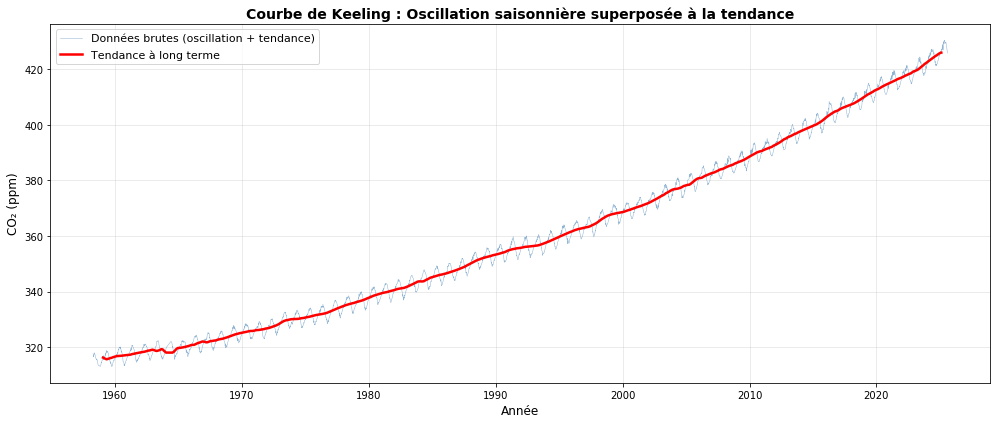

Analyse de la courbe de Keeling


1. Séparation des phénomènes :
   Méthode : Moyenne mobile sur 52 semaines
   → Tendance = moyenne mobile
   → Oscillation = données brutes - tendance

2. Caractérisation de l'oscillation périodique :
   - Amplitude : 4.76 ppm
   - Période : 1.0 an
   - Maximum : Avr (concentration maximale)
   - Minimum : Oct (concentration minimale)

3.Modèle de la contribution lente :
   Modèle choisi : Polynôme de degré 3
   CO₂(t) = -356789.11 + 561.5711·t + -0.2946250·t² + 0.0000515645·t³

   Paramètres estimés :
   - a₀ = -356789.11
   - a₁ = 561.5711
   - a₂ = -0.2946250
   - a₃ = 0.0000515645

4. Extrapolation à 2025 :
   - CO₂ en 1958 : 316.25 ppm
   - CO₂ prédit en 2025 : 425.11 ppm
   - Augmentation : 108.86 ppm (+34.4%)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Lecture des données
data = pd.read_csv('weekly_in_situ_co2_mlo.csv', skiprows=46, header=None, 
                   names=['date', 'co2'])
data['date'] = pd.to_datetime(data['date'])
data = data.dropna()
data['decimal_year'] = data['date'].dt.year + (data['date'].dt.dayofyear - 1) / 365.25

# Calcul de la tendance avec moyenne mobile
window = 52  # 52 semaines = 1 an
data['trend'] = data['co2'].rolling(window=window, center=True).mean()
data['seasonal'] = data['co2'] - data['trend']

# Graphique : superposition des deux phénomènes
plt.figure(figsize=(14, 6))

plt.plot(data['date'], data['co2'], linewidth=0.5, alpha=0.6, 
         label='Données brutes (oscillation + tendance)', color='steelblue')
plt.plot(data['date'], data['trend'], linewidth=2.5, 
         label='Tendance à long terme', color='red')

plt.xlabel('Année', fontsize=12)
plt.ylabel('CO₂ (ppm)', fontsize=12)
plt.title('Courbe de Keeling : Oscillation saisonnière superposée à la tendance', 
          fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('keeling_superpose.png', dpi=200)
plt.show()

# ========== 2. SÉPARATION ET ANALYSE ==========

data_clean = data.dropna()

# CARACTÉRISATION DE L'OSCILLATION SAISONNIÈRE
seasonal_clean = data_clean['seasonal']
amplitude = (seasonal_clean.max() - seasonal_clean.min()) / 2
periode = 1.0  # an

# Trouver la phase (moment du max et du min)
idx_max = seasonal_clean.idxmax()
idx_min = seasonal_clean.idxmin()
mois_max = data_clean.loc[idx_max, 'date'].month
mois_min = data_clean.loc[idx_min, 'date'].month
mois_noms = ['', 'Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 
             'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']

# MODÈLE POLYNOMIAL de la tendance lente
def poly3(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

x_data = data_clean['decimal_year'].values
y_data = data_clean['trend'].values
params, _ = curve_fit(poly3, x_data, y_data)

# EXTRAPOLATION à 2025
co2_2025 = poly3(2025, *params)
co2_debut = data_clean['trend'].iloc[0]

# Affichage des résultats
print("Analyse de la courbe de Keeling")
print("\n\n1. Séparation des phénomènes :")
print("   Méthode : Moyenne mobile sur 52 semaines")
print("   → Tendance = moyenne mobile")
print("   → Oscillation = données brutes - tendance")

print("\n2. Caractérisation de l'oscillation périodique :")
print(f"   - Amplitude : {amplitude:.2f} ppm")
print(f"   - Période : {periode:.1f} an")
print(f"   - Maximum : {mois_noms[mois_max]} (concentration maximale)")
print(f"   - Minimum : {mois_noms[mois_min]} (concentration minimale)")

print("\n3.Modèle de la contribution lente :")
print("   Modèle choisi : Polynôme de degré 3")
print(f"   CO₂(t) = {params[0]:.2f} + {params[1]:.4f}·t + {params[2]:.7f}·t² + {params[3]:.10f}·t³")
print("\n   Paramètres estimés :")
print(f"   - a₀ = {params[0]:.2f}")
print(f"   - a₁ = {params[1]:.4f}")
print(f"   - a₂ = {params[2]:.7f}")
print(f"   - a₃ = {params[3]:.10f}")

print("\n4. Extrapolation à 2025 :")
print(f"   - CO₂ en 1958 : {co2_debut:.2f} ppm")
print(f"   - CO₂ prédit en 2025 : {co2_2025:.2f} ppm")
print(f"   - Augmentation : {co2_2025 - co2_debut:.2f} ppm (+{(co2_2025/co2_debut - 1)*100:.1f}%)")

